### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings("ignore")

# To enable plotting graphs in Jupyter notebook
%matplotlib inline


pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
#pd.options.mode.chained_assignment = None

### Load and explore the data

In [2]:
df = pd.read_csv("Iowa_Liquor_Sales.csv")

In [3]:
data = df.copy()

### Overview of the data

In [4]:
data.head(2)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0000,Lee,nan,NaN,255.0000,Wilson Daniels Ltd.,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.5000,1.1900
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0000,Page,nan,NaN,255.0000,Wilson Daniels Ltd.,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.0000,2.3800


In [5]:
data.tail(2)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
12591075,INV-08368000077,10/31/2017,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0000,OBRIEN,1011200.0000,Straight Bourbon Whiskies,85.0000,Brown Forman Corp.,20369,Old Forester 1870 Whisky Row Series,6,750,$22.49,$33.74,2,$33.74,1.5000,0.3900
12591076,INV-08368000078,10/31/2017,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0000,OBRIEN,1091100.0000,American Distilled Spirit Specialty,481.0000,Sugarlands Distilling Company LLC,77309,Sugarlands Shine Peanut Butter & Jelly Moonshine,6,750,$13.00,$19.50,2,$19.50,1.5000,0.3900


* We see that State Bottle Cost, State Bottle Retail and Sale (Dollars) columns are represented as strings but we will want them to be numeric. We need to remove the dollar sign at the beginning to make them numberic.

### Check number of rows and columns

In [6]:
data.shape

(12591077, 24)

### Lets us Have a look at the column names

In [7]:
data.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

### Check column types

In [8]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12591077 entries, 0 to 12591076
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               object 
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            int64  
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      object 
 19  State Bottle Retail    object 
 20  Bottles Sold           int64  
 21  Sale (Dollars)         object 
 22  Volume Sold (Lit

### Remove columns that are redundent (not useful)

In [9]:
data.drop(['Invoice/Item Number','Store Number','Address','Store Location', 'County Number', 'Vendor Number', 'Item Number','Category', 'Volume Sold (Gallons)'], axis = 1, inplace = True)

In [10]:
data.head(2)

,Date,Store Name,City,Zip Code,County,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,11/20/2015,Keokuk Spirits,KEOKUK,52632,Lee,NaN,Wilson Daniels Ltd.,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.5000
1,11/21/2015,Ding's Honk And Holler,CLARINDA,51632,Page,NaN,Wilson Daniels Ltd.,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.0000


### Find the duplicate rows and delete all rows except the first

In [11]:
data[data.duplicated()].count()

Date                    18127
Store Name              18127
City                    18117
Zip Code                18117
County                  18009
Category Name           18095
Vendor Name             18127
Item Description        18127
Pack                    18127
Bottle Volume (ml)      18127
State Bottle Cost       18127
State Bottle Retail     18127
Bottles Sold            18127
Sale (Dollars)          18127
Volume Sold (Liters)    18127
dtype: int64

In [12]:
data1 = data.drop_duplicates(keep='first')

In [13]:
data1.shape

(12572950, 15)

In [14]:
data1[data1.duplicated()].count()

Date                    0
Store Name              0
City                    0
Zip Code                0
County                  0
Category Name           0
Vendor Name             0
Item Description        0
Pack                    0
Bottle Volume (ml)      0
State Bottle Cost       0
State Bottle Retail     0
Bottles Sold            0
Sale (Dollars)          0
Volume Sold (Liters)    0
dtype: int64

### Find missing values 

In [15]:
data1.isna().sum()

Date                        0
Store Name                  0
City                     2365
Zip Code                 2410
County                  79060
Category Name           16054
Vendor Name                 1
Item Description            0
Pack                        0
Bottle Volume (ml)          0
State Bottle Cost          10
State Bottle Retail        10
Bottles Sold                0
Sale (Dollars)             10
Volume Sold (Liters)        0
dtype: int64

In [16]:
num_missing = data1.isna().sum(axis=1)
num_missing.value_counts()

0    12478000
1       92359
3        2371
2         216
4           4
dtype: int64

### Remove all rows with any null value (<1% of data)

In [17]:
data2 = data1.dropna()

In [18]:
num_missing = data2.isna().sum(axis=1)
num_missing.value_counts()

0    12478000
dtype: int64

### Find unique values in each column

In [19]:
for col in data1.columns:
    print(f'{col} : {data1[col].nunique()}')

Date : 1379
Store Name : 1952
City : 793
Zip Code : 871
County : 200
Category Name : 130
Vendor Name : 393
Item Description : 5865
Pack : 30
Bottle Volume (ml) : 49
State Bottle Cost : 2768
State Bottle Retail : 3224
Bottles Sold : 450
Sale (Dollars) : 23154
Volume Sold (Liters) : 1180


### Convert State Bottle Cost, State Bottle Retail and Sale (Dollars) columns


In [20]:
data3 = data2.copy()

In [21]:
def dollar_to_num(dollar_val):
    """ Removing dollar sign in the Bottle cost, Retail and Sale columns and converting to a float. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(dollar_val, object):
        return float(dollar_val.replace('$',''))
    else:
        return np.nan

In [22]:
def date_to_month(date):
    """ Removing dollar sign in the Bottle cost, Retail and Sale columns and converting to a float. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(date, object):
        return int(date.split('/')[0])
    else:
        return np.nan

In [23]:
def date_to_year(date):
    """ Removing dollar sign in the Bottle cost, Retail and Sale columns and converting to a float. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(date, object):
        return int(date.split('/')[2])
    else:
        return np.nan

In [24]:
col_transforms = {
    'State Bottle Cost': dollar_to_num,
    'State Bottle Retail': dollar_to_num,
    'Sale (Dollars)' : dollar_to_num
}
for k,v in col_transforms.items():
    data3[k] = data3[k].map(v)

In [25]:
data3['Month'] = data3['Date']
data3['Year'] = data3['Date']


In [26]:
#data3['Cost per Liter'] = data3['Sale (Dollars)']/data3['Volume Sold (Liters)']

In [27]:
col_transforms = {
    'Month': date_to_month,
    'Year': date_to_year
}
for k,v in col_transforms.items():
    data3[k] = data3[k].map(v)

### Convert column types as category

In [28]:
data3.columns

Index(['Date', 'Store Name', 'City', 'Zip Code', 'County', 'Category Name',
       'Vendor Name', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Month', 'Year'],
      dtype='object')

In [29]:
Category_Columns = ['Date', 'Store Name', 'City', 'Zip Code', 'County', 'Category Name',
       'Vendor Name', 'Item Description', 'Month', 'Year']

In [30]:
for col in Category_Columns:
    data3[col] = data3[col].astype('category')

In [31]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12478000 entries, 6 to 12591076
Data columns (total 17 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Date                  category
 1   Store Name            category
 2   City                  category
 3   Zip Code              category
 4   County                category
 5   Category Name         category
 6   Vendor Name           category
 7   Item Description      category
 8   Pack                  int64   
 9   Bottle Volume (ml)    int64   
 10  State Bottle Cost     float64 
 11  State Bottle Retail   float64 
 12  Bottles Sold          int64   
 13  Sale (Dollars)        float64 
 14  Volume Sold (Liters)  float64 
 15  Month                 category
 16  Year                  category
dtypes: category(10), float64(4), int64(3)
memory usage: 976.3 MB


### Check summary of data

In [32]:
data3.describe()

,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
count,12478000.0000,12478000.0000,12478000.0000,12478000.0000,12478000.0000,12478000.0000,12478000.0000
mean,12.2248,929.3056,9.6491,14.4964,8.1350,116.5675,7.4939
std,7.4469,728.0717,11.3562,17.0339,22.2161,385.1781,26.8494
min,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,6.0000,750.0000,5.5000,8.2500,2.0000,25.3600,1.5000
50%,12.0000,750.0000,7.9600,11.9500,4.0000,67.1400,3.0000
75%,12.0000,1000.0000,11.7500,17.6300,12.0000,132.7200,9.0000
max,600.0000,378000.0000,7680.0000,11520.0000,15000.0000,254100.0000,15000.0000


### Remove all rows that have volume and cost as Zero

In [33]:
data3 = data3[data3['Bottle Volume (ml)'] != 0]
data3 = data3[data3['State Bottle Cost'] != 0]
data3 = data3[data3['Bottles Sold'] != 0]
data3 = data3[data3['Sale (Dollars)'] != 0]

In [34]:
data3.describe()

,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
count,12472967.0000,12472967.0000,12472967.0000,12472967.0000,12472967.0000,12472967.0000,12472967.0000
mean,12.2248,929.3137,9.6513,14.4998,8.1366,116.6051,7.4953
std,7.4465,728.1668,11.3571,17.0352,22.2201,385.2487,26.8545
min,1.0000,12.0000,0.1900,0.2900,1.0000,1.3400,0.0500
25%,6.0000,750.0000,5.5000,8.2500,2.0000,25.4400,1.5000
50%,12.0000,750.0000,7.9600,11.9600,4.0000,67.1400,3.0000
75%,12.0000,1000.0000,11.7500,17.6300,12.0000,132.7200,9.0000
max,600.0000,378000.0000,7680.0000,11520.0000,15000.0000,254100.0000,15000.0000


In [35]:
data3.describe(include='category')

,Date,Store Name,City,Zip Code,County,Category Name,Vendor Name,Item Description,Month,Year
count,12472967,12472967,12472967,12472967,12472967,12472967,12472967,12472967,12472967,12472967
unique,1379,1949,790,871,200,130,385,5745,12,6
top,12/29/2014,Hy-Vee #3 / BDI / Des Moines,DES MOINES,52402,Polk,VODKA 80 PROOF,Diageo Americas,Black Velvet,10,2016
freq,15980,111572,806549,248840,1826924,1252015,1669107,328908,1124969,2199914


## Univaraite analysis

In [36]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

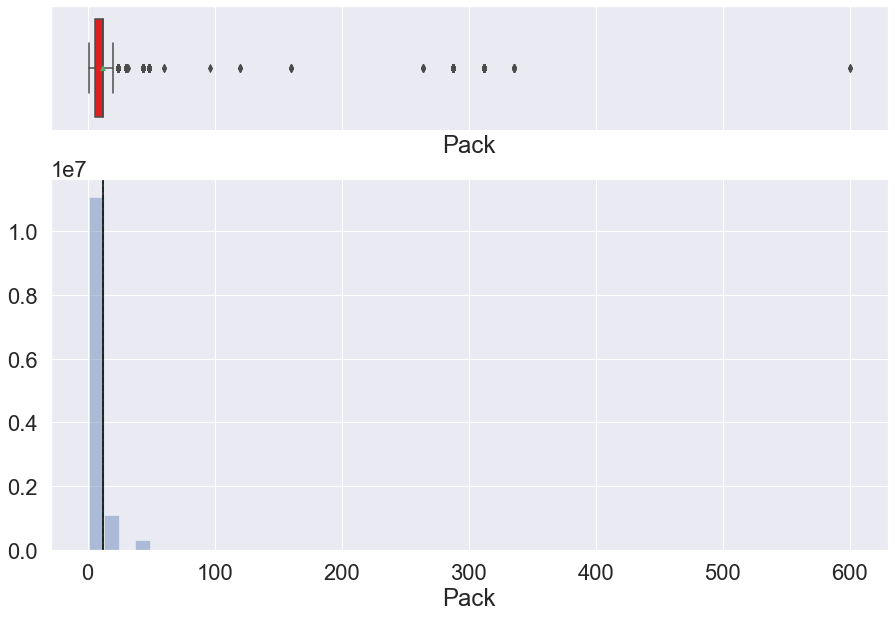

In [37]:
histogram_boxplot(data3['Pack'])

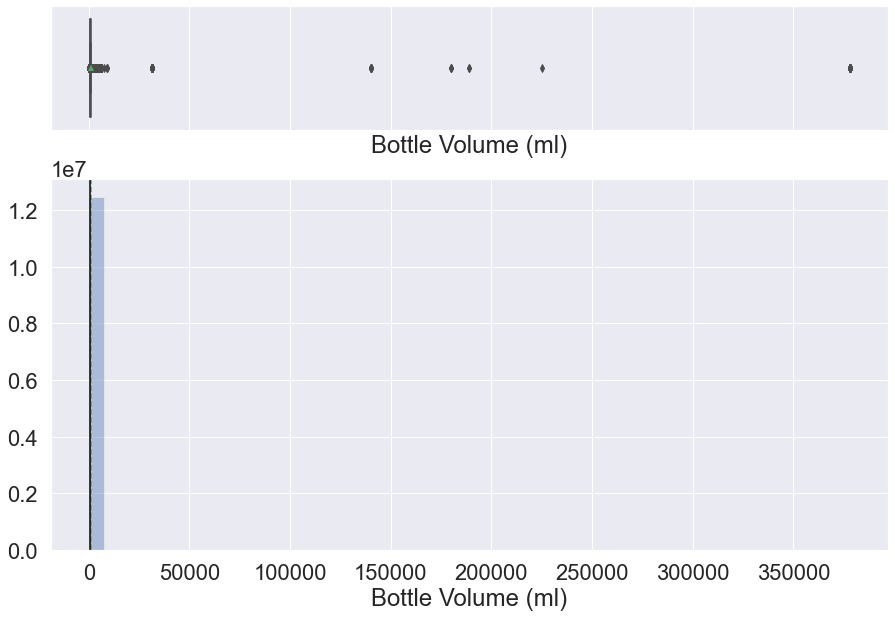

In [38]:
histogram_boxplot(data3['Bottle Volume (ml)'])

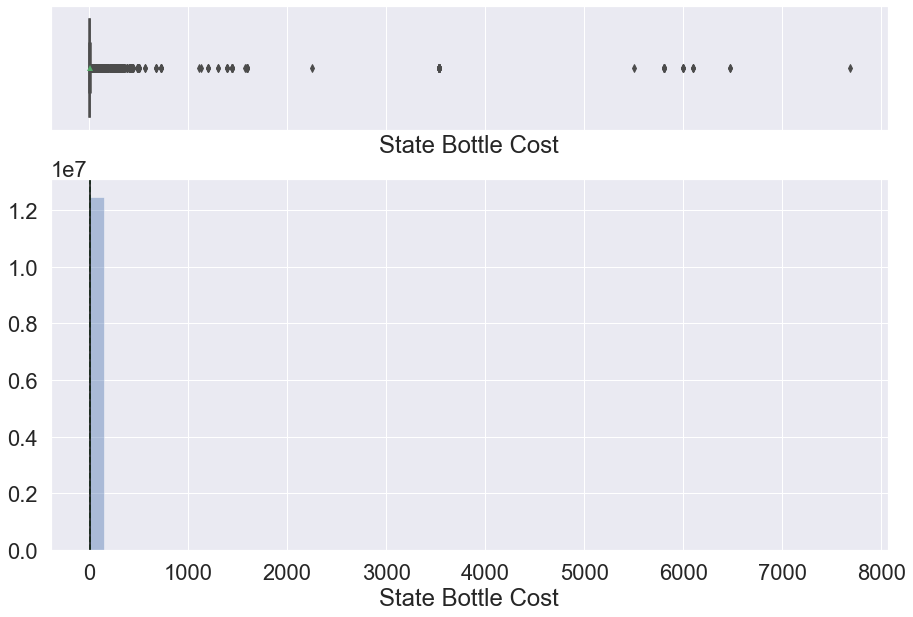

In [39]:
histogram_boxplot(data3['State Bottle Cost'])

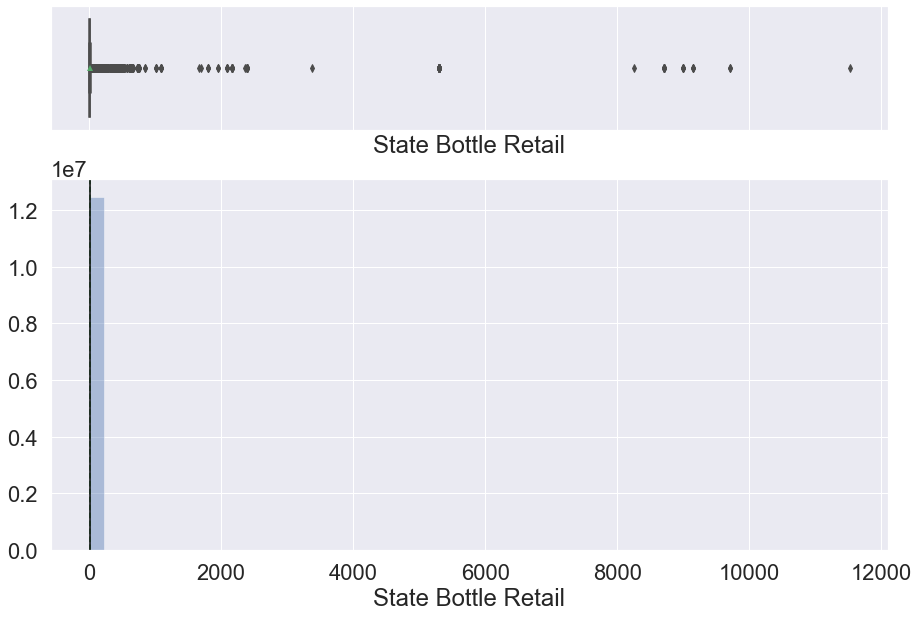

In [40]:
histogram_boxplot(data3['State Bottle Retail'])

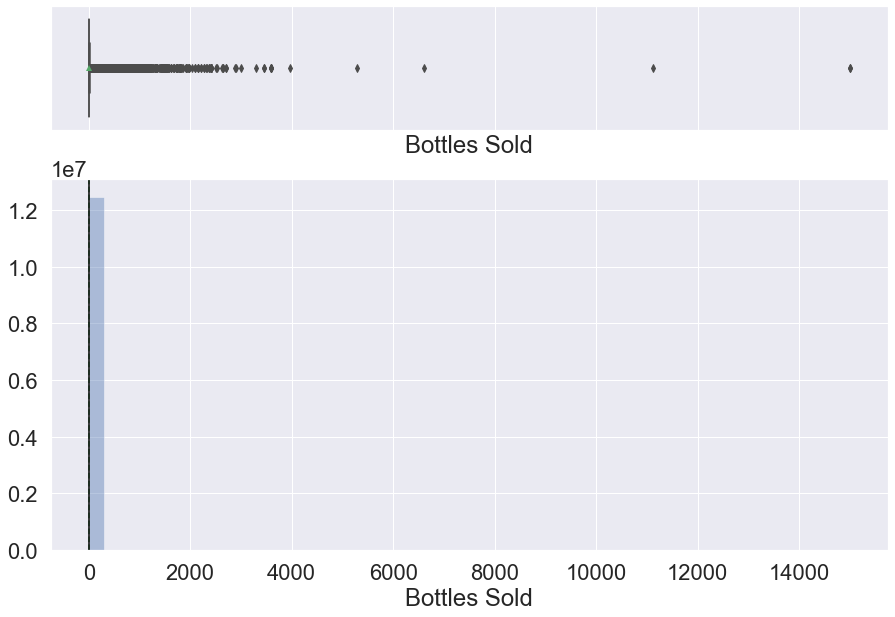

In [41]:
histogram_boxplot(data3['Bottles Sold'])

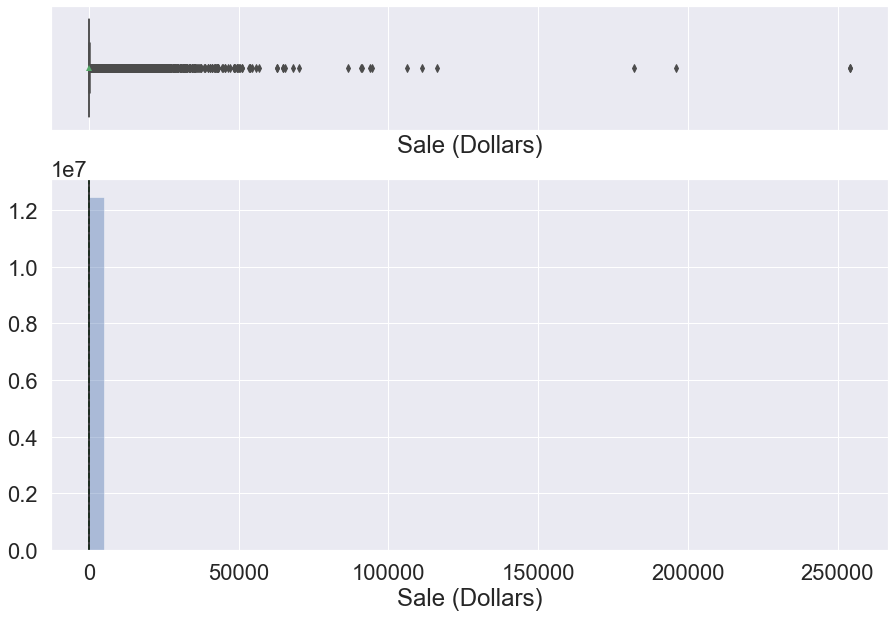

In [42]:
histogram_boxplot(data3['Sale (Dollars)'])

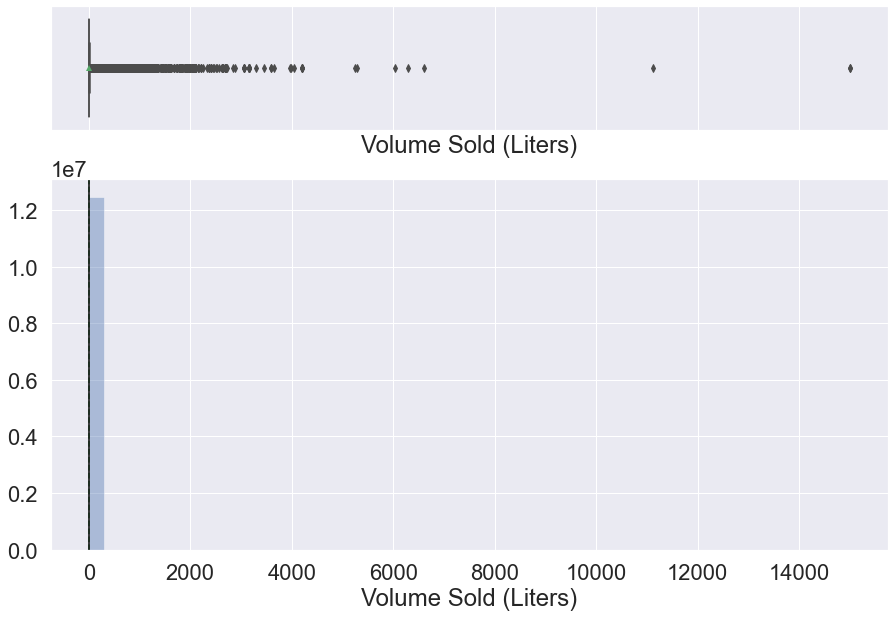

In [43]:
histogram_boxplot(data3['Volume Sold (Liters)'])

In [45]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

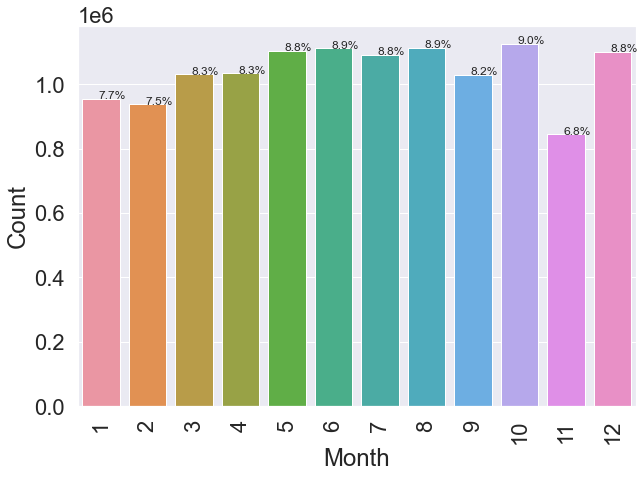

In [46]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data3['Month'])
plt.xlabel('Month')
plt.ylabel('Count')
bar_perc(ax,data3['Month'])
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

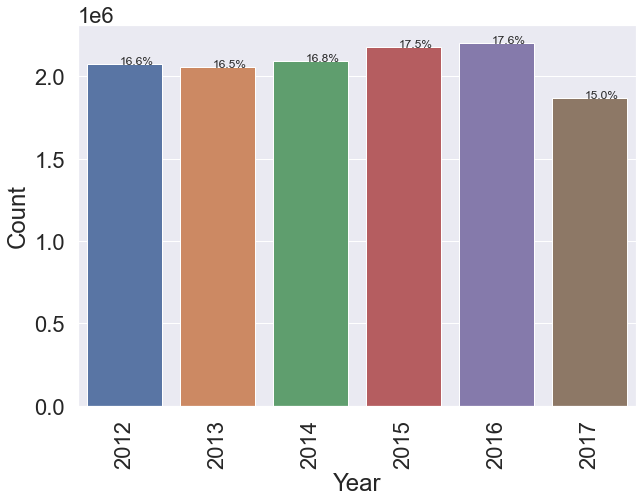

In [47]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data3['Year'])
plt.xlabel('Year')
plt.ylabel('Count')
bar_perc(ax,data3['Year'])
plt.xticks(rotation='vertical')

### Remove very high outliers

In [69]:
data4 = data3.copy()

In [70]:
data4 = data4[data4['Pack'] <= 50]
data4 = data4[data4['Bottle Volume (ml)'] <= 5000]
data4 = data4[data4['State Bottle Cost'] < 500]
data4 = data4[data4['Bottles Sold'] <= 1000]
data4 = data4[data4['Sale (Dollars)'] <= 5000]
data4 = data4[data4['Bottle Volume (ml)'] >= 100]

In [71]:
data4.describe()

,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
count,12458789.0000,12458789.0000,12458789.0000,12458789.0000,12458789.0000,12458789.0000,12458789.0000
mean,12.2246,928.1270,9.6244,14.4594,7.7671,109.4004,7.0155
std,7.3712,484.8516,6.8535,10.2796,14.2496,199.3515,15.6313
min,1.0000,100.0000,0.4800,0.7200,1.0000,1.3400,0.1000
25%,6.0000,750.0000,5.5000,8.2500,2.0000,25.4000,1.5000
50%,12.0000,750.0000,7.9600,11.9500,4.0000,67.1400,3.0000
75%,12.0000,1000.0000,11.7500,17.6300,12.0000,132.4800,9.0000
max,48.0000,4800.0000,498.6400,747.9600,960.0000,4996.8000,1181.2500


In [72]:
data4.shape

(12458789, 17)

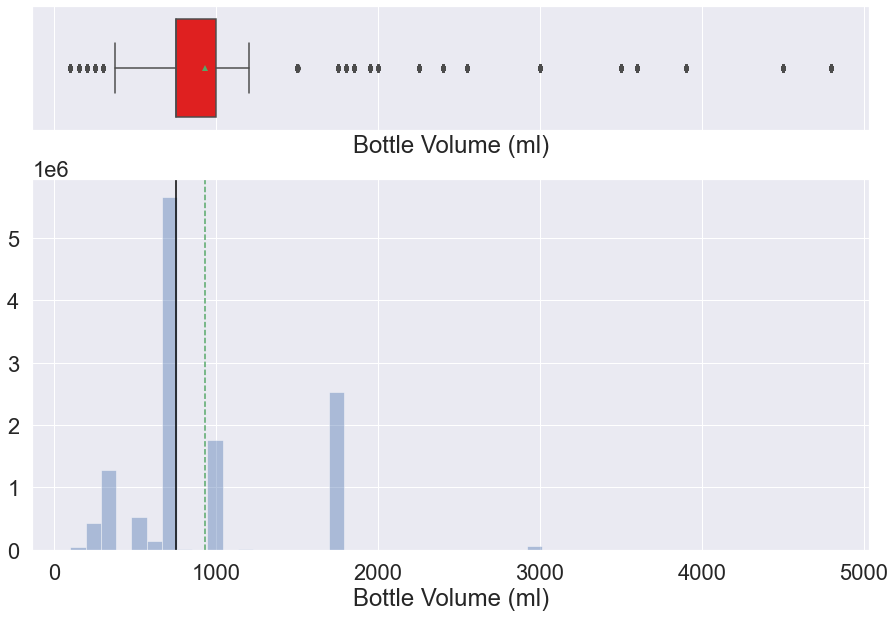

In [73]:
histogram_boxplot(data4['Bottle Volume (ml)'])

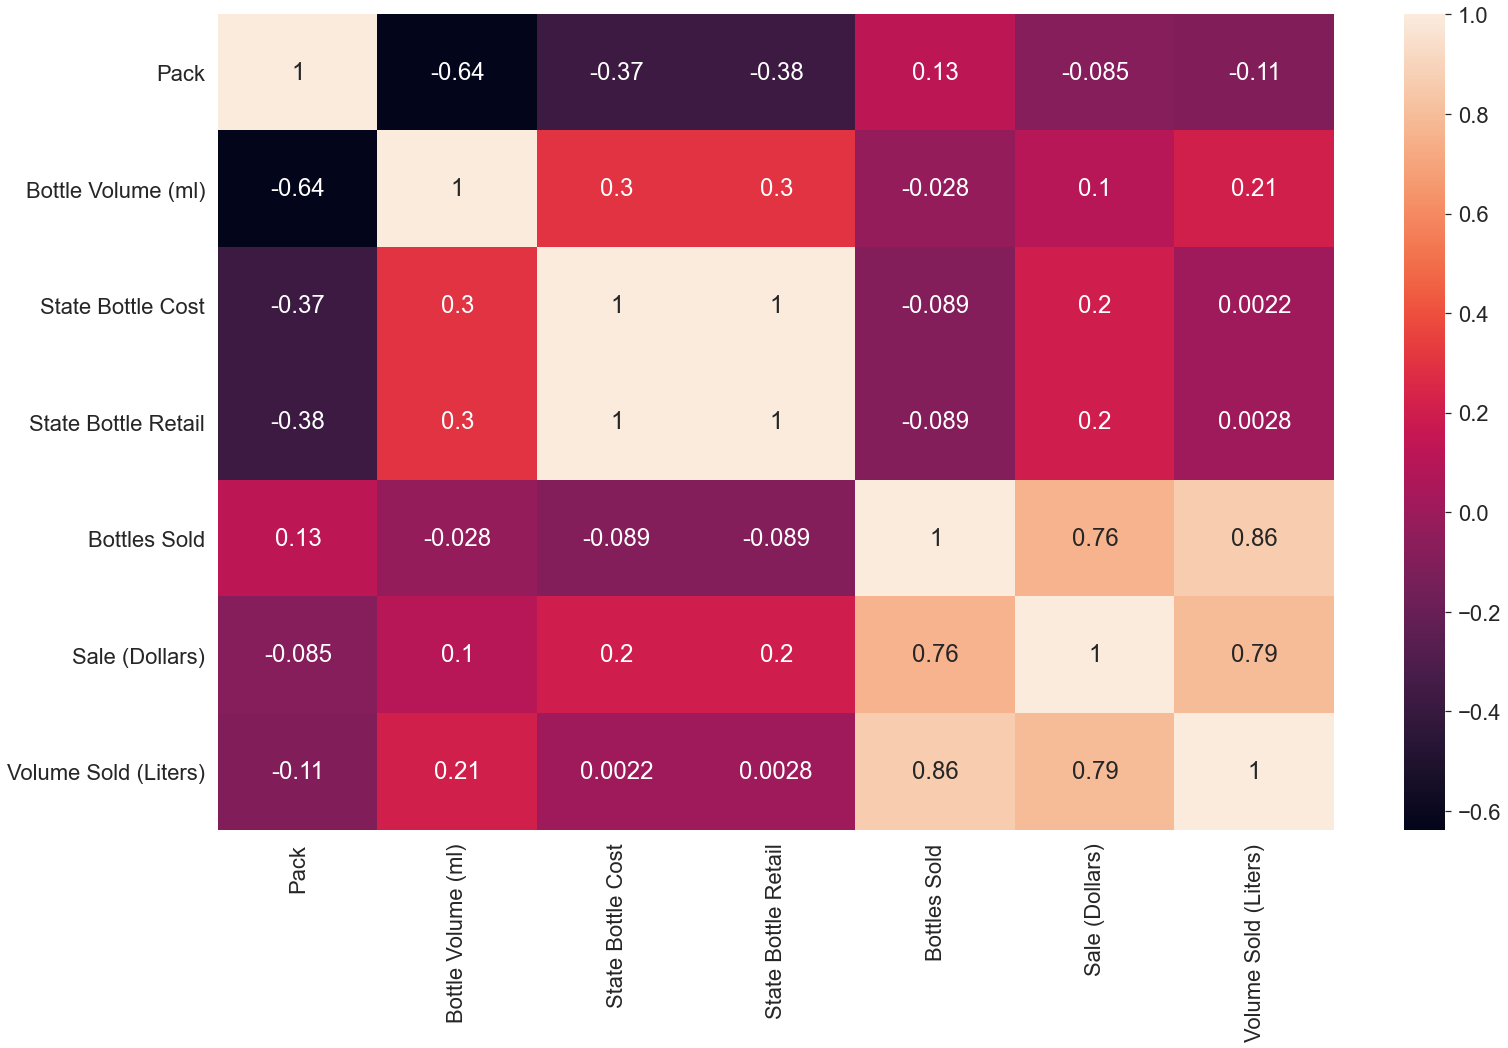

In [74]:
plt.figure(figsize=(25,15))
sns.heatmap(data4.corr(),annot=True)
plt.show()

* State bottle cost and State bottle Retail are perfectly correlated, so we can remove one column, also I think we can remove data column as we have year and month columns seperately. Bottles sold, Sale(Dollars), Volume Sold(Liters) are also are mostly correlated, so we can think of removing one or two of those columns.

In [75]:
data5 = data4.copy()

In [76]:
data5.drop(["State Bottle Cost", "Date"], axis = 1, inplace = True)

In [85]:
data5.reset_index(drop=True, inplace=True)

In [86]:
data5.head(2)

,Store Name,City,Zip Code,County,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Month,Year
0,Hy-Vee Food Store #3 / Waterloo,WATERLOO,50702,Black Hawk,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,17.4300,6,104.5800,9.0000,11,2015
1,Hy-Vee Wine & Spirits / Muscatine,MUSCATINE,52761,Muscatine,DECANTERS & SPECIALTY PACKAGES,Jim Beam Brands,Laphroaig w/ Whiskey Stones,12,750,29.3700,4,117.4800,3.0000,11,2015


In [82]:
data5.shape

(12458789, 15)

Data Prerpocessing:
* Removed most of the columns that are redundent.
* Created a separate year and Month column and removed date column.
* Removed all duplicate rows and rows with null values as they are <1% of total rows.
* Removed roes with wrong inputs for volume and cost (ex: 0)
* Converted State Bottle Cost, State Bottle Retail and Sale (Dollars) columns to numeric by removing the dollar sign.

In [87]:
data5.to_csv (r'/Users/rajasekhar/Desktop/GT-Analytics/DVA/Project/Iowa_Liquor_Sales_Processed.csv', index = False, header=True)

### Clustering

In [78]:
cols = ['Pack','Bottle Volume (ml)','State Bottle Retail','Bottles Sold','Sale (Dollars)','Volume Sold (Liters)']

In [79]:
scaler=StandardScaler()
subset=data4[cols].copy()
subset_scaled=scaler.fit_transform(subset) 

In [80]:
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 1.6980706500592484
Number of Clusters: 2 	Average Distortion: 1.637294224296859
Number of Clusters: 3 	Average Distortion: 1.364052362865421
Number of Clusters: 4 	Average Distortion: 1.163018363017158
Number of Clusters: 5 	Average Distortion: 1.1141725250968202
Number of Clusters: 6 	Average Distortion: 1.0021925912839391
Number of Clusters: 7 	Average Distortion: 0.9341392072774938
Number of Clusters: 8 	Average Distortion: 0.913090939038838


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

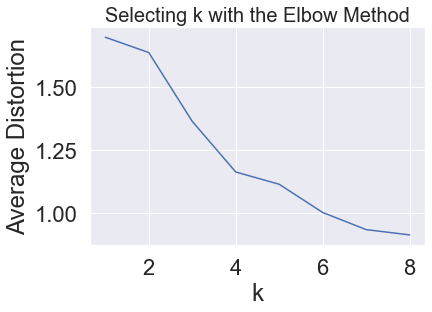

In [81]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)